In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

In [6]:
!wget --no-check-certificate \
    https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip \
    -O /tmp/traffic-signs-data.zip

--2020-09-21 10:12:38--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.24
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.24|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘/tmp/traffic-signs-data.zip’

/tmp/traffic-signs- 100%[===================>] 117,80M   967KB/s    in 2m 8s   

2020-09-21 10:14:46 (943 KB/s) - ‘/tmp/traffic-signs-data.zip’ saved [123524425/123524425]



In [3]:
import pickle
import os
path = '/tmp/'
train = pickle.load(open(path+"train.p", 'rb'))
valid=pickle.load(open(path+"valid.p", 'rb'))
test = pickle.load(open(path+"test.p", 'rb'))

In [4]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

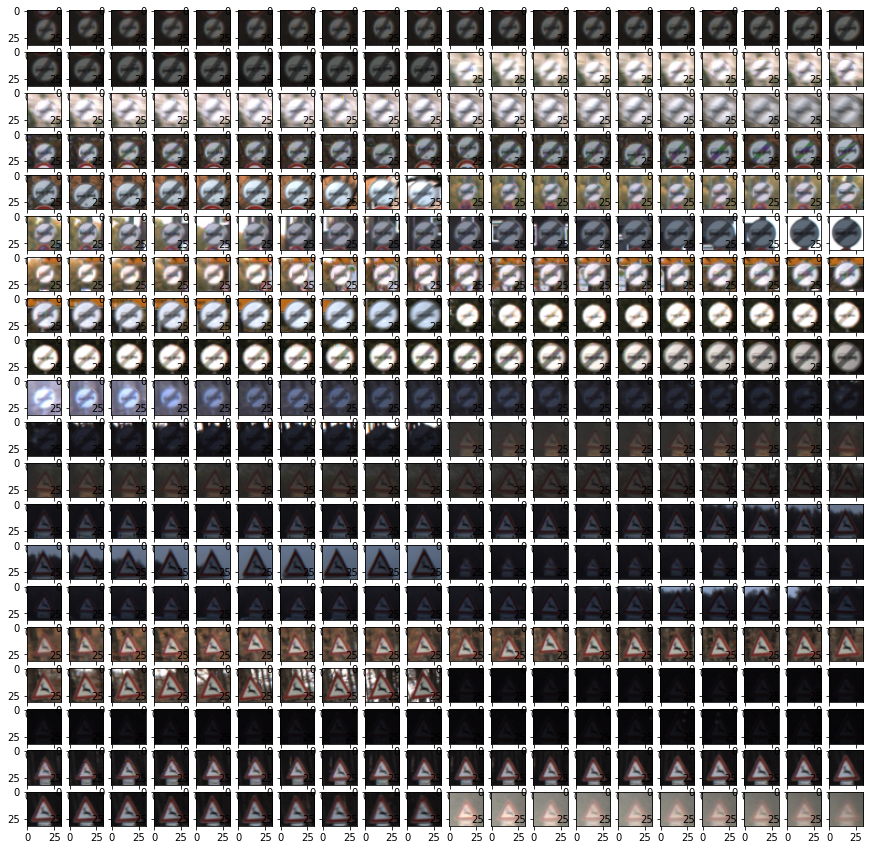

In [26]:
fig, axes = plt.subplots(20,20, figsize=(15,15))
for i,ax in  enumerate(axes.flat):
    ax.imshow(X_train[i])

In [6]:
sign_names = pd.read_csv('signnames.csv')

In [7]:
sign_names.head()


ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)

In [23]:
sign_names.describe(include='all')

ClassId                                           SignName
count   43.000000                                                 43
unique        NaN                                                 43
top           NaN  End of no passing by vehicles over 3.5 metric ...
freq          NaN                                                  1
mean    21.000000                                                NaN
std     12.556539                                                NaN
min      0.000000                                                NaN
25%     10.500000                                                NaN
50%     21.000000                                                NaN
75%     31.500000                                                NaN
max     42.000000                                                NaN

In [43]:
#sign_names.at[10,'SignName']
results = list(np.random.permutation(np.arange(0,y_test.shape[0])))
len(results)

12630

In [50]:
for i in results[:100]:
    sign_index = y_train[i]
    print(sign_index,sign_names.at[sign_index,'SignName'])

9 No passing
26 Traffic signals
16 Vehicles over 3.5 metric tons prohibited
3 Speed limit (60km/h)
23 Slippery road
4 Speed limit (70km/h)
4 Speed limit (70km/h)
22 Bumpy road
5 Speed limit (80km/h)
4 Speed limit (70km/h)
9 No passing
4 Speed limit (70km/h)
9 No passing
26 Traffic signals
9 No passing
4 Speed limit (70km/h)
1 Speed limit (30km/h)
3 Speed limit (60km/h)
3 Speed limit (60km/h)
3 Speed limit (60km/h)
26 Traffic signals
3 Speed limit (60km/h)
3 Speed limit (60km/h)
11 Right-of-way at the next intersection
40 Roundabout mandatory
41 End of no passing
1 Speed limit (30km/h)
42 End of no passing by vehicles over 3.5 metric tons
4 Speed limit (70km/h)
9 No passing
9 No passing
31 Wild animals crossing
1 Speed limit (30km/h)
11 Right-of-way at the next intersection
1 Speed limit (30km/h)
9 No passing
4 Speed limit (70km/h)
3 Speed limit (60km/h)
3 Speed limit (60km/h)
26 Traffic signals
3 Speed limit (60km/h)
1 Speed limit (30km/h)
9 No passing
1 Speed limit (30km/h)
9 No passi

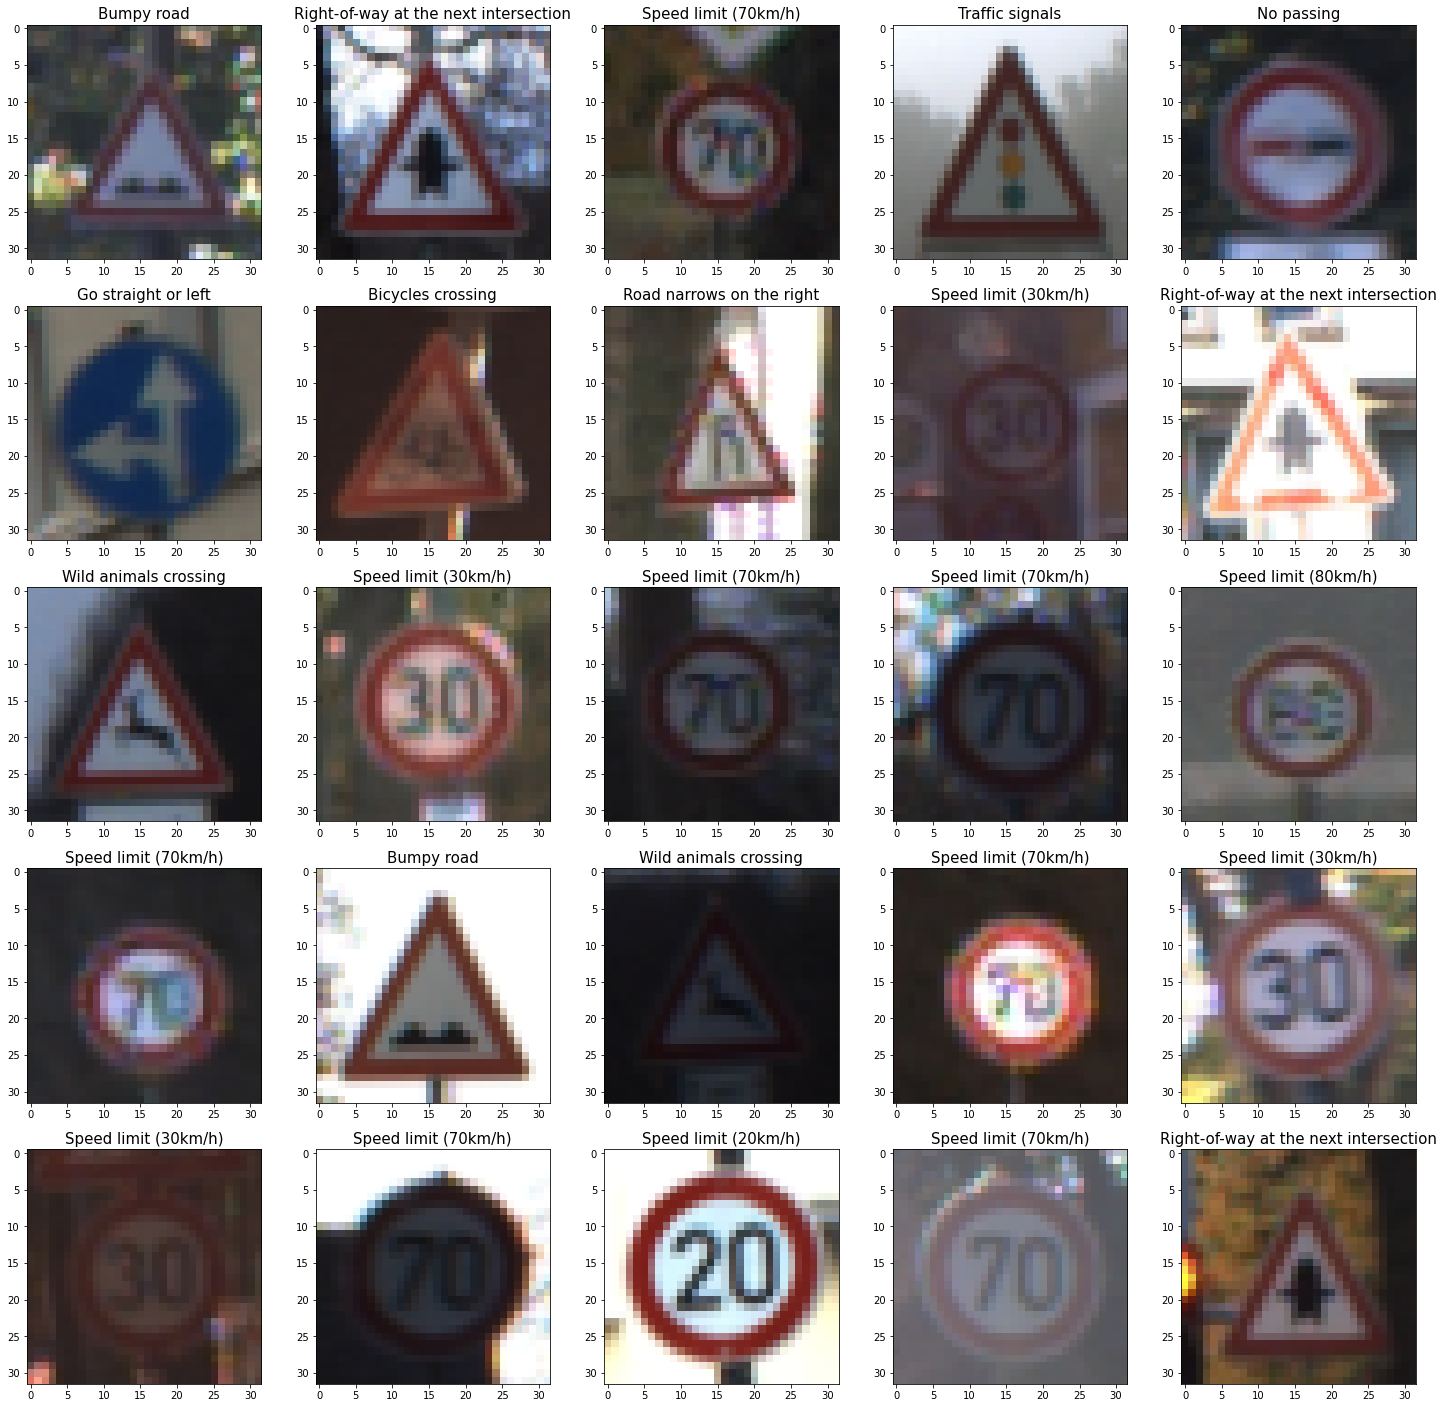

In [16]:
fig, axes = plt.subplots(5,5, figsize=(25,25))
results = list(np.random.permutation(np.arange(0,y_test.shape[0])))
for i,ax in  enumerate(axes.flat):
    pos = results[i]
    sign_index = y_train[pos]
    ax.set_title(sign_names.at[sign_index,'SignName'],fontsize=15)
    ax.imshow(X_train[pos])